Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [1]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

In [194]:
# imports
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install plotly

!{sys.executable} -m pip install collections
!{sys.executable} -m pip install xgboost

from collections import namedtuple

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [3]:
twitch_df = pd.read_csv("twitch_clean_data_Kelly.csv", parse_dates=["Date"])
twitch_df.head()

,Date,DST,ONI,Go_Deeper,Chatting,Stardew,DD,Ori_Blind_Forest,Manual_Samuel,Divinity_II,...,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
0,2017-06-13,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0.0,0.0,0.0,1,0.033333,12.66666667,66.66666667
1,2017-06-14,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0.0,0.0,0.0,2,0.066667,10,34.61538462
2,2017-06-15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0.0,0.0,0.0,3,0.100000,40,300
3,2017-06-16,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0.0,0.0,0.0,4,0.133333,2.923076923,38.46153846
4,2017-06-17,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0.0,0.0,0.0,5,0.166667,8.333333333,66.66666667


In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(twitch_df, minimal=True).to_notebook_iframe()

profile

In [5]:
twitch_df.columns


Index(['Date', 'DST', 'ONI', 'Go_Deeper', 'Chatting', 'Stardew', 'DD',
       'Ori_Blind_Forest', 'Manual_Samuel', 'Divinity_II',
       ...
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'Total_Sub_Revenue',
       'donations', 'Total_Earnings', 'streak', 'activity',
       'avg_message_per_viewer', 'user_chatting_percent'],
      dtype='object', length=122)

In [84]:
np.set_printoptions(threshold=sys.maxsize)

In [85]:
twitch_df.isnull().sum()

DST                            0
ONI                            0
Go_Deeper                      0
Chatting                       0
Stardew                        0
DD                             0
Ori_Blind_Forest               0
Manual_Samuel                  0
Divinity_II                    0
Drawful2                       0
Running_Rifles                 0
Cat_Quest                      0
Cuphead                        0
Hotline_Miami                  0
Terraria                       0
DS                             0
Getting_Over_It                0
Golf_w_Friends                 0
Escapists2                     0
Human_Fall_Flat                0
Castle_Crashers                0
Bridge_Constructor_Portal      0
Choice_Chamber                 0
KTANE                          0
Doki_Doki                      0
GeoGuessr                      0
Jackbox                        0
We_Were_Here_Too               0
Stick_Fight                    0
Hacktag                        0
Into_Breac

In [7]:
pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', 130)


In [28]:
twitch_df = twitch_df.fillna(value= 0)
twitch_df.isnull().sum()

Date                           0
DST                            0
ONI                            0
Go_Deeper                      0
Chatting                       0
Stardew                        0
DD                             0
Ori_Blind_Forest               0
Manual_Samuel                  0
Divinity_II                    0
Drawful2                       0
Running_Rifles                 0
Cat_Quest                      0
Cuphead                        0
Hotline_Miami                  0
Terraria                       0
DS                             0
Getting_Over_It                0
Golf_w_Friends                 0
Escapists2                     0
Human_Fall_Flat                0
Castle_Crashers                0
Bridge_Constructor_Portal      0
Choice_Chamber                 0
KTANE                          0
Doki_Doki                      0
GeoGuessr                      0
Jackbox                        0
We_Were_Here_Too               0
Stick_Fight                    0
Hacktag   

In [29]:
twitch_df.shape

(1159, 121)

In [30]:
twitch_df.avg_message_per_viewer.value_counts()

0.000000     314
10.000000      2
12.944444      2
6.333333       2
9.000000       2
            ... 
8.532258       1
6.137931       1
12.510870      1
14.849206      1
3.473498       1
Name: avg_message_per_viewer, Length: 835, dtype: int64

In [31]:
twitch_df.user_chatting_percent.value_counts()

0.000000      314
33.333333      13
100.000000      7
66.666667       7
46.153846       5
             ... 
20.149254       1
52.083333       1
36.923077       1
34.745763       1
25.757576       1
Name: user_chatting_percent, Length: 701, dtype: int64

In [32]:
replace_list = ["inf", "Unknown"]

In [33]:
twitch_df= twitch_df.replace(to_replace=replace_list, value=0)

In [34]:
twitch_df.user_chatting_percent.value_counts()

0.000000      314
33.333333      13
100.000000      7
66.666667       7
46.153846       5
             ... 
20.149254       1
52.083333       1
36.923077       1
34.745763       1
25.757576       1
Name: user_chatting_percent, Length: 701, dtype: int64

In [35]:
twitch_df["user_chatting_percent"]= twitch_df["user_chatting_percent"].astype(str).astype(float)

In [36]:
twitch_df["avg_message_per_viewer"]= twitch_df["avg_message_per_viewer"].astype(str).astype(float)

In [37]:
twitch_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1159 entries, 2017-06-13 to 2020-08-14
Columns: 121 entries, DST to user_chatting_percent
dtypes: float64(93), int64(28)
memory usage: 1.1 MB


In [38]:
twitch_df.describe(include="all")

,DST,ONI,Go_Deeper,Chatting,Stardew,DD,Ori_Blind_Forest,Manual_Samuel,Divinity_II,Drawful2,Running_Rifles,Cat_Quest,Cuphead,Hotline_Miami,Terraria,DS,Getting_Over_It,Golf_w_Friends,Escapists2,Human_Fall_Flat,Castle_Crashers,Bridge_Constructor_Portal,Choice_Chamber,KTANE,Doki_Doki,GeoGuessr,Jackbox,We_Were_Here_Too,Stick_Fight,Hacktag,Into_Breach,Portia,Act_it_OutXL,Little Nightmares,Dauntless,Domina,ToS,Surviving_Mars,Way_Out,Move_Die,Hollow_Knight,Spy_Party,Monster_Prom,Shantae_Pirates_Curse,Subnautica,Use_Your_Words,Witch_It,Im_Bread,Agario,Moonlighter,Ultimate_Chicken_Horse,Spelunky,Overcooked2,Graveyard_Keeper,DBD,Amnesia_Dark_Descent,Layers_of_Fear,Borderlands2,Rapture_Rejects,Undertale,Into_the_Breach,Marbles,Tabletop_Sim,2Point_Hospital,Yokus_Island,Slime_Rancher,Secret_Neighbor,Hotline_Miami.1,Cook_Serve_Delicious2,Unnamed: 70,Time_Portia,Griftlands,Stream_Raiders,Yomawari,Darkwood,7D2D,Dream_Daddy,ARK,Stream_Racer,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
count,1159.00000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.0,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.00000,1159.000000,1159.000000,1159.00000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000
mean,0.27610,0.006903,0.002588,0.141501,0.068162,0.023296,0.000863,0.000863,0.000863,0.100949,0.000863,0.002588,0.017256,0.000863,0.006040,0.000863,0.003451,0.000863,0.005177,0.002588,0.001726,0.000863,0.009491,0.001726,0.001726,0.003451,0.176877,0.000863,0.001726,0.000863,0.000863,0.000863,0.000863,0.002588,0.002588,0.001726,0.001726,0.001726,0.001726,0.003451,0.018119,0.000863,0.000863,0.004314,0.020708,0.010354,0.000863,0.000863,0.001726,0.005177,0.001726,0.001726,0.003451,0.011217,0.002588,0.003451,0.001726,0.000863,0.000863,0.002588,0.003451,0.006903,0.001726,0.001726,0.000863,0.002588,0.003451,0.000863,0.000863,0.0,0.004314,0.001726,0.001726,0.002588,0.001726,0.050043,0.005177,0.012942,0.000863,21.841096,1163.233822,32.854185,9.550475,1.616911,6.120794,5.237394,171.141501,39.040552,4862.647972,170.433995,112.671268,2.195889,0.566165,4.809927,6.515626,0.01092,0.003486,0.037101,0.22692,0.849871,0.759275,0.087144,0.003451,2.026747,2.018119,0.006040,0.002588,0.143227,0.143227,0.1

In [39]:
twitch_df["Date"].isnull().sum()

KeyError: 'Date'

In [26]:
twitch_df = twitch_df.set_index(keys="Date")

In [40]:
twitch_df.head()

,DST,ONI,Go_Deeper,Chatting,Stardew,DD,Ori_Blind_Forest,Manual_Samuel,Divinity_II,Drawful2,Running_Rifles,Cat_Quest,Cuphead,Hotline_Miami,Terraria,DS,Getting_Over_It,Golf_w_Friends,Escapists2,Human_Fall_Flat,Castle_Crashers,Bridge_Constructor_Portal,Choice_Chamber,KTANE,Doki_Doki,GeoGuessr,Jackbox,We_Were_Here_Too,Stick_Fight,Hacktag,Into_Breach,Portia,Act_it_OutXL,Little Nightmares,Dauntless,Domina,ToS,Surviving_Mars,Way_Out,Move_Die,Hollow_Knight,Spy_Party,Monster_Prom,Shantae_Pirates_Curse,Subnautica,Use_Your_Words,Witch_It,Im_Bread,Agario,Moonlighter,Ultimate_Chicken_Horse,Spelunky,Overcooked2,Graveyard_Keeper,DBD,Amnesia_Dark_Descent,Layers_of_Fear,Borderlands2,Rapture_Rejects,Undertale,Into_the_Breach,Marbles,Tabletop_Sim,2Point_Hospital,Yokus_Island,Slime_Rancher,Secret_Neighbor,Hotline_Miami.1,Cook_Serve_Delicious2,Unnamed: 70,Time_Portia,Griftlands,Stream_Raiders,Yomawari,Darkwood,7D2D,Dream_Daddy,ARK,Stream_Racer,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-06-13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1,0.033333,12.666667,66.666667
2017-06-14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2,0.066667,10.000000,34.615385
2017-06-15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.45,40,3,0,0,2,0.0,1,8,89,20,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,3,0.100000,40.000000,300.000000
2017-06-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.73,38,5,0,0,2,0.0,17,6,421,115,13,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,4,0.133333,2.923077,38.461538
2017-06-17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.99,100,8,0,0,0,0.0,16,7,591,148,12,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,5,0.166667,8.333333,66.666667


## Wrangle - 
    Set Date as index or use David's toordinal
    replace_list = ["inf", "Unknown"]
    twitch_df.fillna(value= 0)

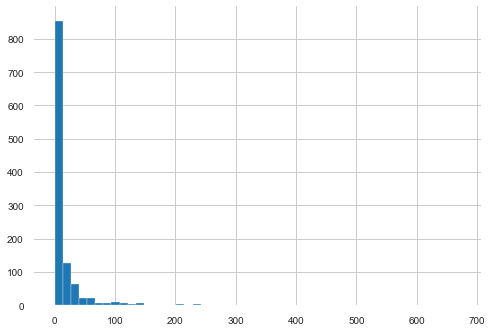

In [41]:
twitch_df['Total_Earnings'].hist(bins=50);

In [42]:
# lets get an average sales price
guess_price = twitch_df['Total_Earnings'].mean()
guess_price

19.597481449525453

In [43]:
# make function that will do it for us
def get_naive_baseline(target_feature):
  guess = target_feature.mean()
  errors = guess - target_feature
  mean_absolute_error = errors.abs().mean()

  naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE"])

  return naive_baseline(guess, errors, mean_absolute_error)

In [44]:
nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [45]:
y_target = twitch_df['Total_Earnings']

In [46]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.


In [47]:
twitch_df["avg_message_per_viewer"].isnull().sum()

0

In [48]:
# print("Baseline MAE:\n", mean_absolute_error(df['price'], [df['price'].mean()]*400716))
# print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings']),
#                         twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings'].iloc[:,0])))
# print('\nTraining MAE:\n', mean_absolute_error(y_train, boost_model.predict(X_train)))

In [49]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
# print("Baseline MAE:\n", mean_absolute_error(df['price'], [df['price'].mean()]*len(df['price'])))
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))

Baseline RMSE:
 4.953788609107101


In [51]:
print(nbaseline.guess)
print(nbaseline.MAE)
print(nbaseline.errors.shape)

19.597481449525453
24.54002158371927
(1159,)


In [52]:
# # make function that will do it for us
# def get_naive_baseline(target_feature):
#   guess = target_feature.mean()
#   errors = guess - target_feature
#   mean_absolute_error = errors.abs().mean()

# #   y_pred = [target_feature.mean()] * len(target_feature.iloc[:,0])
#   r2 = r2_score(target_feature, y_pred)

#   naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE", "R2"])

#   return naive_baseline(guess, errors, mean_absolute_error, r2)

In [53]:
nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [54]:
nbaseline

baseline_info(guess=19.597481449525453, errors=Date
2017-06-13    19.597481
2017-06-14    19.597481
2017-06-15    19.597481
2017-06-16    19.597481
2017-06-17    19.597481
                ...    
2020-08-10    17.142481
2020-08-11    19.597481
2020-08-12    17.196981
2020-08-13    13.936981
2020-08-14    16.137481
Name: Total_Earnings, Length: 1159, dtype: float64, MAE=24.54002158371927)

In [55]:
twitch_df['Total_Earnings'].mean()

19.597481449525453

In [56]:
# a= twitch_df['Total_Earnings'] *twitch_df['Total_Earnings'].mean()
# a

In [57]:
y_pred = [twitch_df["Total_Earnings"].mean()] * len(twitch_df["Total_Earnings"])
y_pred

[19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449525453,
 19.597481449

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
mean_squared_error(y_target, y_pred)

2960.2625199312783

In [60]:
r2 = r2_score(y_target, y_pred)
print(r2)

0.0


In [102]:
np.set_printoptions(threshold=sys.maxsize)
twitch_df.columns[0:90]

Index(['DST', 'ONI', 'Go_Deeper', 'Chatting', 'Stardew', 'DD',
       'Ori_Blind_Forest', 'Manual_Samuel', 'Divinity_II', 'Drawful2',
       'Running_Rifles', 'Cat_Quest', 'Cuphead', 'Hotline_Miami', 'Terraria',
       'DS', 'Getting_Over_It', 'Golf_w_Friends', 'Escapists2',
       'Human_Fall_Flat', 'Castle_Crashers', 'Bridge_Constructor_Portal',
       'Choice_Chamber', 'KTANE', 'Doki_Doki', 'GeoGuessr', 'Jackbox',
       'We_Were_Here_Too', 'Stick_Fight', 'Hacktag', 'Into_Breach', 'Portia',
       'Act_it_OutXL', 'Little Nightmares', 'Dauntless', 'Domina', 'ToS',
       'Surviving_Mars', 'Way_Out', 'Move_Die', 'Hollow_Knight', 'Spy_Party',
       'Monster_Prom', 'Shantae_Pirates_Curse', 'Subnautica', 'Use_Your_Words',
       'Witch_It', 'Im_Bread', 'Agario', 'Moonlighter',
       'Ultimate_Chicken_Horse', 'Spelunky', 'Overcooked2', 'Graveyard_Keeper',
       'DBD', 'Amnesia_Dark_Descent', 'Layers_of_Fear', 'Borderlands2',
       'Rapture_Rejects', 'Undertale', 'Into_the_Breach', 'Ma

In [93]:
twitch_df.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1159 entries, 2017-06-13 to 2020-08-14
Columns: 121 entries, DST to user_chatting_percent
dtypes: float64(93), int64(28)
memory usage: 1.1 MB
None


# short list a Feature Matrix
short_list = ['Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
         'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
        'Total_Earnings', 'streak', 'avg_message_per_viewer',
        'activity', 'user_chatting_percent','Total_Earnings']

In [63]:
# short_list = ['Average Viewers', 'Chat Messages', 'Chatters',
#               'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
#        'Max Viewers', 'Minutes Streamed', 'Unique Viewers',
#          'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
#        'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
#         'Total_Earnings', 'streak', 'avg_message_per_viewer',
#         'activity', 'user_chatting_percent']

In [103]:
long_list = ['DST', 'ONI', 'Go_Deeper', 'Chatting', 'Stardew', 'DD',
       'Ori_Blind_Forest', 'Manual_Samuel', 'Divinity_II', 'Drawful2',
       'Running_Rifles', 'Cat_Quest', 'Cuphead', 'Hotline_Miami', 'Terraria',
       'DS', 'Getting_Over_It', 'Golf_w_Friends', 'Escapists2',
       'Human_Fall_Flat', 'Castle_Crashers', 'Bridge_Constructor_Portal',
       'Choice_Chamber', 'KTANE', 'Doki_Doki', 'GeoGuessr', 'Jackbox',
       'We_Were_Here_Too', 'Stick_Fight', 'Hacktag', 'Into_Breach', 'Portia',
       'Act_it_OutXL', 'Little Nightmares', 'Dauntless', 'Domina', 'ToS',
       'Surviving_Mars', 'Way_Out', 'Move_Die', 'Hollow_Knight', 'Spy_Party',
       'Monster_Prom', 'Shantae_Pirates_Curse', 'Subnautica', 'Use_Your_Words',
       'Witch_It', 'Im_Bread', 'Agario', 'Moonlighter',
       'Ultimate_Chicken_Horse', 'Spelunky', 'Overcooked2', 'Graveyard_Keeper',
       'DBD', 'Amnesia_Dark_Descent', 'Layers_of_Fear', 'Borderlands2',
       'Rapture_Rejects', 'Undertale', 'Into_the_Breach', 'Marbles',
       'Tabletop_Sim', '2Point_Hospital', 'Yokus_Island', 'Slime_Rancher',
       'Secret_Neighbor', 'Hotline_Miami.1', 'Cook_Serve_Delicious2',
        'Time_Portia', 'Griftlands', 'Stream_Raiders',
       'Yomawari', 'Darkwood', '7D2D', 'Dream_Daddy', 'ARK', 'Stream_Racer',
       'Average Viewers', 'Chat Messages', 'Chatters',
        'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
        'Max Viewers', 'Minutes Streamed', 'Unique Viewers',
         'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
         'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
        'Total_Earnings', 'streak', 'avg_message_per_viewer',
        'activity', 'user_chatting_percent']

In [104]:
# feature_matrix_df = twitch_df[short_list]
feature_matrix_df = twitch_df[long_list]

In [105]:
# Make a function to create Matrix and Target pre validation split
def create_Xmatrix_ytarget(training_df):
  y_target = training_df["Total_Earnings"]
  X_matrix = training_df.drop("Total_Earnings", axis=1)
  return (X_matrix, y_target)

In [106]:
X_matrix, y_target = create_Xmatrix_ytarget(feature_matrix_df)
print(X_matrix.shape)
print(y_target.shape)

(1159, 98)
(1159,)


# Train Val Test split

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_matrix, y_target, train_size=0.80, test_size=0.20, random_state=42)

In [109]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test.shape)
print(y_test.shape)

(927, 98)
(927,)
(232, 98)
(232,)


In [110]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, train_size=0.80, test_size=0.20, random_state=42)

In [111]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(741, 98)
(741,)
(186, 98)
(186,)
(232, 98)
(232,)


# Let's make a pipeline!  (finally...!)

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest

In [113]:
lr_model = make_pipeline(
    SelectKBest(),
    LinearRegression()
)

### Short list transforms - SelectKBest, 

In [114]:
lr_model.fit(X_train, y_train)

/Users/kellycho/.local/share/virtualenvs/StarKells_Twitch_data-N6g9n_I3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 6  7 10 15 16 17 18 19 20 21 22 23 24 30 32 33 34 35 36 37 38 39 41 42
 43 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69
 70 71 72 73 75 77] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/kellycho/.local/share/virtualenvs/StarKells_Twitch_data-N6g9n_I3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/kellycho/.local/share/virtualenvs/StarKells_Twitch_data-N6g9n_I3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(steps=[('selectkbest', SelectKBest()),
                ('linearregression', LinearRegression())])

In [115]:
training_MAE = mean_absolute_error(y_train, lr_model.predict(X_train))

In [116]:
validation_MAE = mean_absolute_error(y_val, lr_model.predict(X_val))

In [117]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Baseline RMSE:
 4.953788609107101
Training MAE: 25.19034974509962
Validation MAE: 26.24015636138577


In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rf_bag_model = make_pipeline(
    RandomForestRegressor(random_state=42)
)

In [120]:
rf_bag_model.fit(X_train, y_train)

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [121]:
training_MAE = mean_absolute_error(y_train, rf_bag_model.predict(X_train))

In [122]:
validation_MAE = mean_absolute_error(y_val, rf_bag_model.predict(X_val))

In [123]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Baseline RMSE:
 4.953788609107101
Training MAE: 8.50186513593278
Validation MAE: 21.013244191340245


In [208]:
response_var_column03 = rf_bag_model.predict(X_train)
model_rsme03 = mean_squared_error(y_train, response_var_column03, squared=False)
model_r2_03 = r2_score(y_train, response_var_column03)

In [209]:
print(f"Model RMSE: {model_rsme03}")
print(f"Model R^2: {model_r2_03}")

Model RMSE: 19.59685187862727
Model R^2: 0.8816952744539874


## try the GradientBoostingRegressor

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
rf_boost_model = make_pipeline(
    GradientBoostingRegressor(random_state=42)
)

rf_boost_model.fit(X_train, y_train)

Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [126]:
training_MAE2 = mean_absolute_error(y_train, rf_boost_model.predict(X_train))

In [127]:
validation_MAE2 = mean_absolute_error(y_val, rf_boost_model.predict(X_val))

In [128]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE2}")
print(f"Validation MAE: {validation_MAE2}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Baseline RMSE:
 4.953788609107101
Training MAE: 10.717474506052325
Validation MAE: 20.795864498094282


In [201]:
response_var_column = rf_boost_model.predict(X_train)
model_rsme = mean_squared_error(y_train, response_var_column, squared=False)
model_r2 = r2_score(y_train, response_var_column)



In [203]:
print(f"Model RMSE: {model_rsme}")
print(f"Model R^2: {model_r2}")

Model RMSE: 20.276348613184982
Model R^2: 0.8733488985086173


 ### Try XGBoost
 

In [195]:

from xgboost import XGBRegressor

In [197]:
xgb_model = make_pipeline(
   XGBRegressor()
)
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [198]:
training_MAE07 = mean_absolute_error(y_train, xgb_model.predict(X_train))

In [199]:
validation_MAE07 = mean_absolute_error(y_val, xgb_model.predict(X_val))

In [200]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE07}")
print(f"Validation MAE: {validation_MAE07}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Baseline RMSE:
 4.953788609107101
Training MAE: 0.8342864006080449
Validation MAE: 22.709284568732787


In [204]:
response_var_column02 = xgb_model.predict(X_train)
model_rsme02 = mean_squared_error(y_train, response_var_column02, squared=False)
model_r2_02 = r2_score(y_train, response_var_column02)

In [205]:
print(f"Model RMSE: {model_rsme02}")
print(f"Model R^2: {model_r2_02}")

Model RMSE: 1.3256770128273516
Model R^2: 0.9994586166144005


## Feature Importances

In [131]:
# rf_bag_model = make_pipeline(
#     RandomForestRegressor(random_state=42)
# )

In [132]:
# rf_bag_model.fit(X_train, y_train)

In [133]:
fi= rf_bag_model.named_steps["randomforestregressor"].feature_importances_

In [134]:
importances = pd.Series(fi, X_train.columns).sort_values(ascending=False)
importances

Chatters                       2.712634e-01
Average Viewers                1.342234e-01
Chat Messages                  6.443748e-02
Max Viewers                    4.920140e-02
user_chatting_percent          4.843499e-02
Live Views                     4.773927e-02
avg_message_per_viewer         4.768922e-02
Hosts and Raids Viewers (%)    4.340725e-02
Minutes Streamed               3.664695e-02
activity                       3.531185e-02
Unique Viewers                 2.972520e-02
Follows                        2.936258e-02
streak                         2.355179e-02
Stardew                        2.263247e-02
Stream_Raiders                 1.675177e-02
Into_the_Breach                1.440288e-02
day_of_week_1                  1.432178e-02
day_of_week_6                  8.603832e-03
Yomawari                       6.304168e-03
Getting_Over_It                6.186466e-03
7D2D                           5.593183e-03
DST                            4.960188e-03
Chatting                       4

<AxesSubplot:>

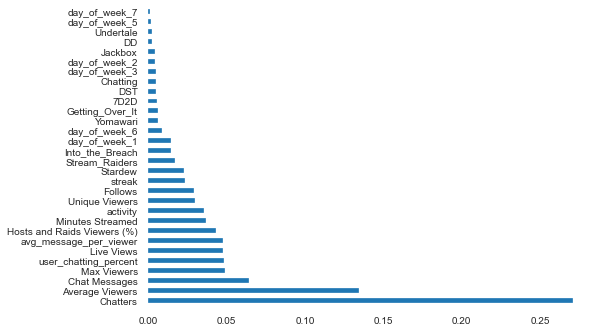

In [137]:
importances.head(30).plot(kind="barh")

## Drop Column

### Permutation IMportance
train model on full dataset
Choose a column an shuffle rows
See how the validation metrics change

In [138]:
X_val["activity"].head(10)

Date
2019-05-15    0.500000
2018-12-09    0.633333
2018-07-31    1.000000
2017-07-30    0.966667
2020-06-20    0.533333
2019-07-29    0.566667
2018-10-09    1.000000
2019-08-12    0.533333
2019-01-23    0.766667
2017-11-08    1.000000
Name: activity, dtype: float64

In [139]:
X_val_permuted = X_val.copy()

In [140]:
np.random.permutation(X_val["activity"])[:10]

array([0.5       , 0.96666667, 0.93333333, 0.8       , 0.3       ,
       0.53333333, 0.83333333, 0.9       , 0.53333333, 0.46666667])

In [141]:
X_val_permuted["activity"] = np.random.permutation(X_val_permuted["activity"])

In [142]:
X_val_permuted["activity"].head(10)

Date
2019-05-15    1.000000
2018-12-09    0.200000
2018-07-31    0.933333
2017-07-30    1.000000
2020-06-20    0.900000
2019-07-29    0.500000
2018-10-09    0.400000
2019-08-12    0.800000
2019-01-23    0.533333
2017-11-08    0.533333
Name: activity, dtype: float64

In [143]:
X_val_permuted["activity"].value_counts()

0.966667    24
1.000000    21
0.500000    20
0.533333    18
0.933333    16
0.466667    14
0.900000    10
0.633333     8
0.566667     8
0.800000     8
0.733333     5
0.866667     4
0.833333     4
0.666667     4
0.433333     4
0.766667     4
0.300000     4
0.600000     4
0.400000     2
0.333333     1
0.200000     1
0.033333     1
0.266667     1
Name: activity, dtype: int64

In [144]:
X_val["activity"].value_counts()

0.966667    24
1.000000    21
0.500000    20
0.533333    18
0.933333    16
0.466667    14
0.900000    10
0.633333     8
0.566667     8
0.800000     8
0.733333     5
0.866667     4
0.833333     4
0.666667     4
0.433333     4
0.766667     4
0.600000     4
0.300000     4
0.400000     2
0.333333     1
0.200000     1
0.033333     1
0.266667     1
Name: activity, dtype: int64

In [145]:
rf_boost_model2 = make_pipeline(
    GradientBoostingRegressor(random_state=42)
)

rf_boost_model2.fit(X_train, y_train)

Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])

In [146]:
validation_MAE2 = mean_absolute_error(y_val, rf_boost_model2.predict(X_val))

In [147]:
validation_MAE3 = mean_absolute_error(y_val, rf_boost_model2.predict(X_val_permuted))

In [148]:
training_MAE2 = mean_absolute_error(y_train, rf_boost_model2.predict(X_train))

In [149]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print(f"Training MAE: {training_MAE2}")
print(f"Validation MAE: {validation_MAE2}")
print(f"Validation MAE Permuted: {validation_MAE3}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Training MAE: 10.717474506052325
Validation MAE: 20.795864498094282
Validation MAE Permuted: 22.742615564395702


### Automate it. 

In [150]:
from sklearn.inspection import permutation_importance

In [151]:
pi = permutation_importance(rf_boost_model2, X_val, y_val)

In [152]:
type(pi)

sklearn.utils.Bunch

In [153]:
pi

{'importances_mean': array([-1.31237434e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         8.85907250e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  7.94855251e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.56414414e-06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.77828300e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.000000

In [154]:
pi_df = pd.DataFrame({"importances_mean": np.round(pi["importances_mean"], 4),
                     "importances_std": pi["importances_std"]},
                    index=X_val.columns)

In [155]:
pi_df.sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
Stardew,0.0886,0.065603
Chatters,0.0719,0.033801
Max Viewers,0.0420,0.011448
user_chatting_percent,0.0301,0.014409
Chat Messages,0.0211,0.010154
Hosts and Raids Viewers (%),0.0185,0.007623
Average Viewers,0.0173,0.016175
Live Views,0.0130,0.004330
7D2D,0.0097,0.002164
activity,0.0089,0.022313


### Compare Permutation importance (top 15) with SelectKBest(Default)

In [184]:
perm_shortlist = pi_df.sort_values(by="importances_mean", ascending=False).head(33).index

In [185]:
perm_shortlist

Index(['Stardew', 'Chatters', 'Max Viewers', 'user_chatting_percent',
       'Chat Messages', 'Hosts and Raids Viewers (%)', 'Average Viewers',
       'Live Views', '7D2D', 'activity', 'avg_message_per_viewer',
       'Minutes Streamed', 'day_of_week_3', 'Marbles', 'Terraria',
       'Layers_of_Fear', '2Point_Hospital', 'Tabletop_Sim', 'Into_the_Breach',
       'Rapture_Rejects', 'Borderlands2', 'Amnesia_Dark_Descent',
       'Ultimate_Chicken_Horse', 'Overcooked2', 'DBD', 'Graveyard_Keeper',
       'ONI', 'Spelunky', 'Slime_Rancher', 'Yokus_Island', 'Yomawari',
       'Secret_Neighbor', 'Hotline_Miami.1'],
      dtype='object')

In [186]:
lr_perm_model = make_pipeline(
    LinearRegression()
)

lr_perm_model.fit(X_train[perm_shortlist], y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [187]:
training_MAE4 = mean_absolute_error(y_train, lr_perm_model.predict(X_train[perm_shortlist]))

In [188]:
validation_MAE4 = mean_absolute_error(y_val, lr_perm_model.predict(X_val[perm_shortlist]))

## original lr w/ SelectKBest

In [189]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Baseline RMSE:
 4.953788609107101
Training MAE: 8.50186513593278
Validation MAE: 21.013244191340245


## lr w/ Perm Importance Shortlist

In [190]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE4}")
print(f"Validation MAE: {validation_MAE4}")

If we estimated Total Earnings at $19.597481449525453,
we would be off by $24.54002158371927 on average.
Baseline RMSE:
 4.953788609107101
Training MAE: 23.071133240676016
Validation MAE: 22.614553532399775
